# Global Terrorism (1970 - 2015)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.animation as animation
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

try:
    t_file = pd.read_csv('globalterrorismdb_0616dist.csv', encoding='ISO-8859-1')
    print('File load: Success')
except:
    print('File load: Failed')

File load: Success


In [2]:
t_file = t_file[np.isfinite(t_file.latitude)]

In [3]:
t_file.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,0,0,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
regions = list(set(t_file.region_txt))
colors = ['yellow', 'red', 'lightblue', 'purple', 'green', 'orange', 'brown',\
          'aqua', 'lightpink', 'lightsage', 'lightgray', 'navy']

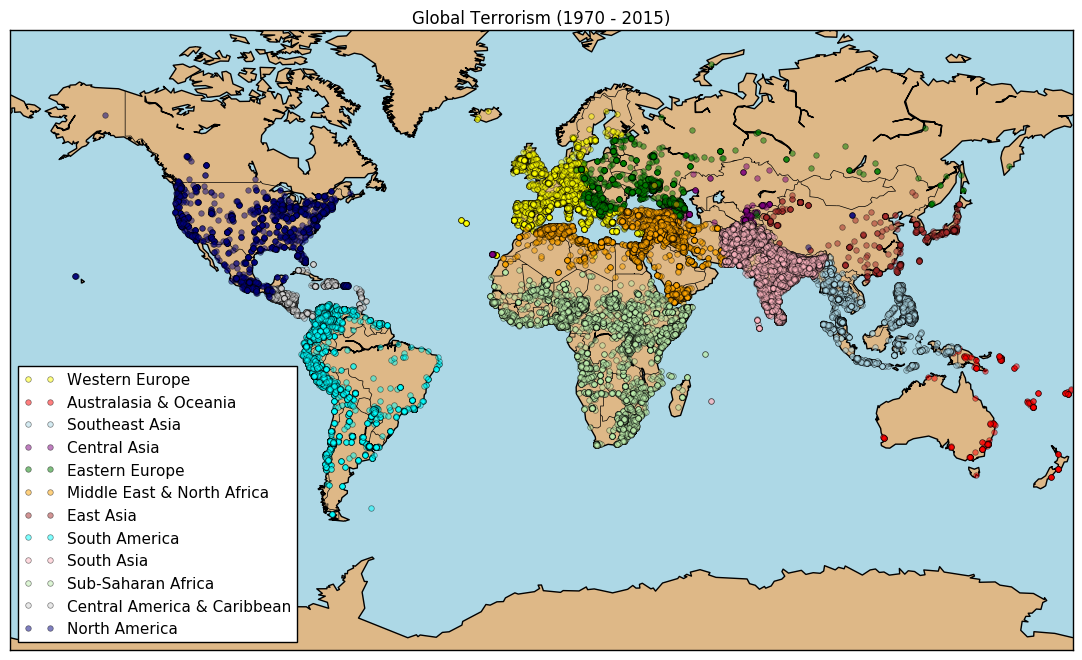

In [5]:
plt.figure(figsize=(15,8))
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='burlywood',lake_color='lightblue', zorder = 1)
m.drawmapboundary(fill_color='lightblue')

def pltpoints(region, color = None, label = None):
    x, y = m(list(t_file.longitude[t_file.region_txt == region].astype("float")),\
            (list(t_file.latitude[t_file.region_txt == region].astype("float"))))
    points = m.plot(x, y, "o", markersize = 4, color = color, label = label, alpha = .5)
    return(points)

for i, region in enumerate(regions):
    pltpoints(region, color = colors[i], label = region)  
    
plt.title("Global Terrorism (1970 - 2015)")
plt.legend(loc ='lower left', prop= {'size':11})
plt.show()    

**From the graph above, we can see, that terrorism is widespread, but judging by where the points are located, and quite obviously, it mostly affects areas that are more densley populated.**

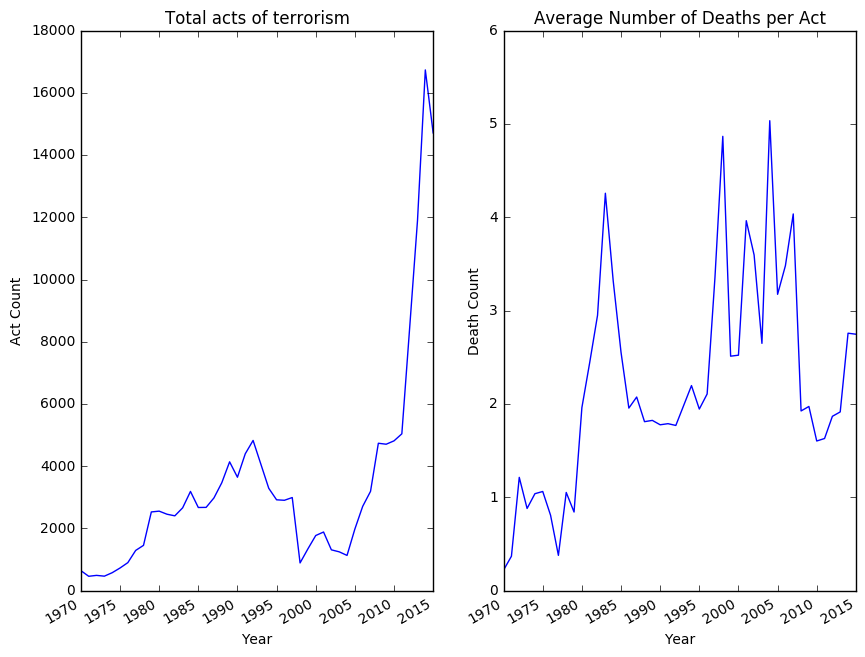

In [6]:
count_year = t_file.groupby(['iyear']).count()
mean_year = t_file.groupby(['iyear']).mean()

fig = plt.figure(figsize = (10,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.set(title = 'Total acts of terrorism', ylabel = 'Act Count', xlabel = 'Year')
ax1.plot(count_year.index, count_year.eventid)
ax2.set(title = 'Average Number of Deaths per Act', ylabel = 'Death Count', xlabel = 'Year')
ax2.plot(mean_year.index, mean_year.nkill)
fig.autofmt_xdate()

**As we can see from the above graphs, not only has the number of terroristic acts increased, but also the number of deaths per act hs been on the rise. This could possible be due to there being more densely populated areas over time.**

In [7]:
region_mean_kills = {}
for region in regions:
    region_mean_kills[region] = t_file.nkill[t_file.region_txt == region].mean()

yearly_mean_kills = {}
for year in list(set(t_file.iyear)):
    yearly_mean_kills[year] = t_file.nkill[t_file.iyear == year].mean()

def mapmean(row):
    for k,v in region_mean_kills.items():
        if k == row['region_txt']:
            result = v
    return result

In [8]:
t_file['region_mean'] = t_file.apply(mapmean, axis = 1)
t_file['nkill-mean'] = t_file['nkill'] - t_file['region_mean']
t_file['absnkill-mean'] = abs(t_file['nkill-mean'])

In [9]:
def get_points(year, region = regions):
    points = t_file[['iyear', 'latitude', 'longitude', 'nkill', 'region_mean', 'nkill-mean', 'absnkill-mean']][t_file.iyear == year]
    return(points)

# Lastly:
    
   ** Here is an animation of how terrorism has progressed from 1970 throgh 2015**

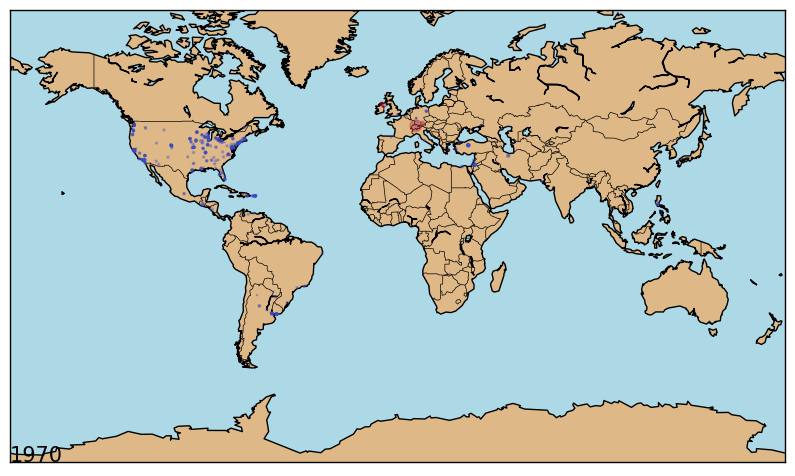

In [10]:
fig = plt.figure(figsize=(10, 10))
cmap = plt.get_cmap('coolwarm')

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='burlywood',lake_color='lightblue', zorder = 1)
m.drawmapboundary(fill_color='lightblue')

START_YEAR = 1970
LAST_YEAR = 2015

points = get_points(START_YEAR)
x, y= m(list(points['longitude']), list(points['latitude']))
scat = m.scatter(x, y, s = points['absnkill-mean']*2, marker='o', alpha=0.3, zorder=10, c = points['nkill-mean'], cmap = cmap)
year_text = plt.text(-170, 80, str(START_YEAR),fontsize=15)

def update(frame_number):
    current_year = START_YEAR + (frame_number % (LAST_YEAR - START_YEAR + 1))
    points = get_points(current_year)
    color = list(points['nkill-mean'])
    x, y = m(list(points['longitude']), list(points['latitude']))
    scat.set_offsets(np.dstack((x, y)))
    scat.set_color(cmap(points['nkill-mean']))
    scat.set_sizes(points['absnkill-mean']*1.5)
    year_text.set_text(str(current_year))

ani = animation.FuncAnimation(fig, update, interval=750, frames=LAST_YEAR - START_YEAR + 1)
HTML(ani.to_html5_video())